In [12]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [13]:
#getting dataset
ds = pd.read_csv('Global_Pollution_Analysis.csv')
ds.head()



,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [28]:
#Encoding categorical data 
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
ds['Country'] = lencoder.fit_transform(ds['Country'])
ds.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Pollution_Index,severity
0,77,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,149.640000,high
1,147,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,88.093333,low
2,136,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,98.890000,low
3,38,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,147.116667,high
4,46,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,142.746667,high


In [15]:
#Scaling data
DataToScale = ds.drop(['Country','Year'],axis=1)
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
Scaled_Data=ss.fit_transform(DataToScale)
Scaled_df = pd.DataFrame(Scaled_Data, columns=DataToScale.columns)
Scaled_df.head()

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,0.898042,0.553778,0.295481,0.949995,0.299867,0.070756,0.810198,0.740954,0.618509,0.203053,0.289991
1,0.147062,0.173673,0.768178,0.559811,0.996027,0.092527,0.705301,0.660833,0.241645,0.686667,0.494539
2,0.166727,0.310542,0.800768,0.559529,0.978556,1.000000,0.097484,0.370326,0.648843,0.621628,0.832411
3,0.929982,0.214222,0.596973,0.748028,0.273323,0.146326,0.312893,0.175207,0.012853,0.333232,0.302734
4,0.520331,0.573161,0.799537,0.768261,0.058679,0.272347,0.650494,0.784683,0.632905,0.937405,0.590773


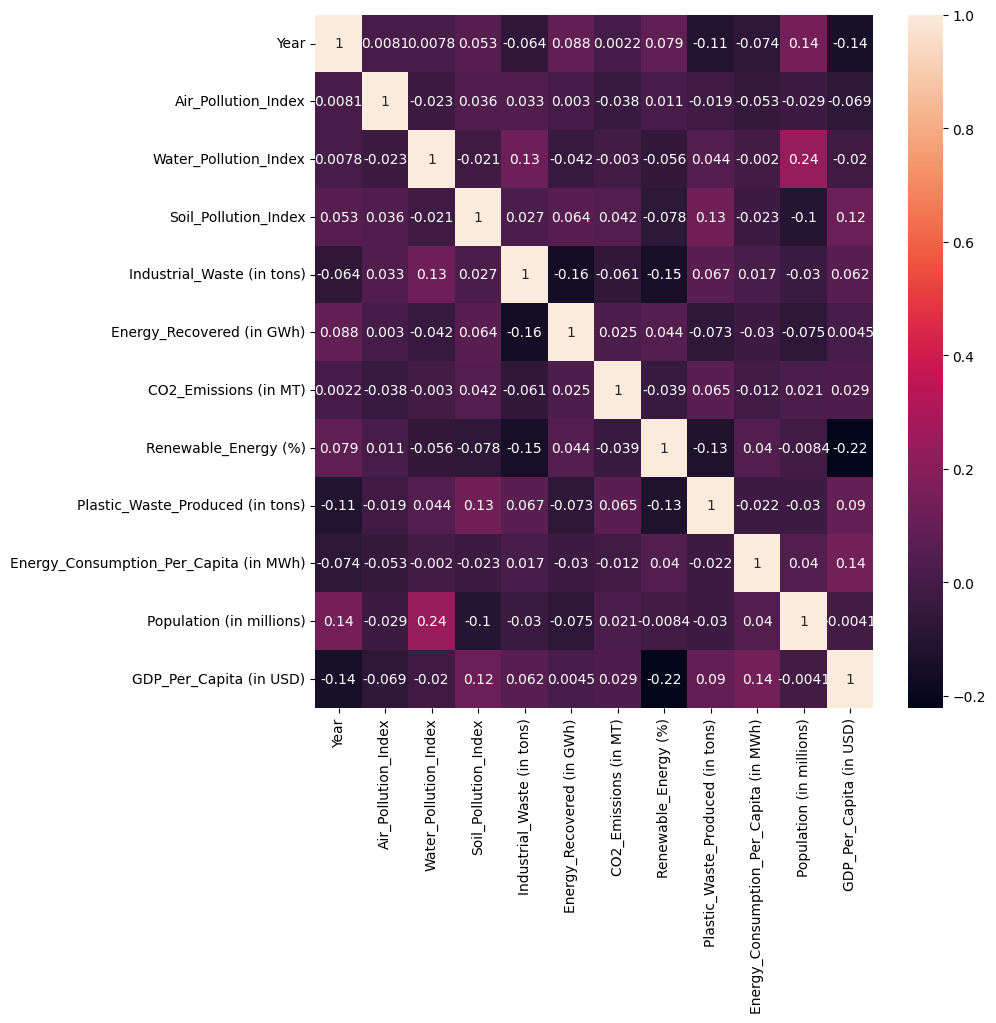

In [16]:

plt.figure(figsize=(9,9))
sns.heatmap(ds.corr(numeric_only=True),annot=True)
plt.show()

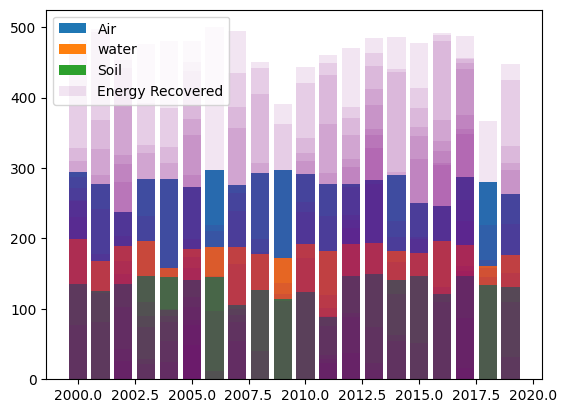

In [17]:
#trends of different polution with time

plt.bar(ds['Year'],ds['Air_Pollution_Index'],label = "Air")

plt.bar(ds['Year'],ds['Water_Pollution_Index'],label = 'water')

plt.bar(ds['Year'],ds['Soil_Pollution_Index'],label = 'Soil')

plt.bar(ds['Year'],ds['Energy_Recovered (in GWh)'],label = "Energy Recovered",color='purple',alpha=0.1)
plt.legend()
plt.show()


In [18]:
#WE can see that over time air pollution is more and soil is less and energy recovered also very good.

In [19]:
#Making a linear regression model to calculate energy recovery
#first lets see which variables are linear with the energy recovery by bar graph we can see all the polution index are almost same so check only 1


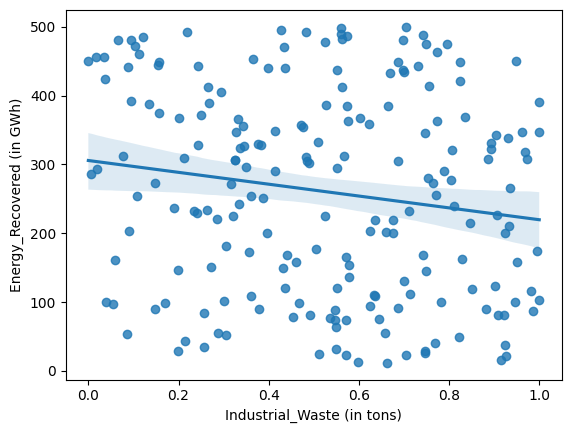

In [20]:

sns.regplot(x=Scaled_df['Industrial_Waste (in tons)'],y=ds['Energy_Recovered (in GWh)'])
plt.show()
#Yes this can be used as feature.


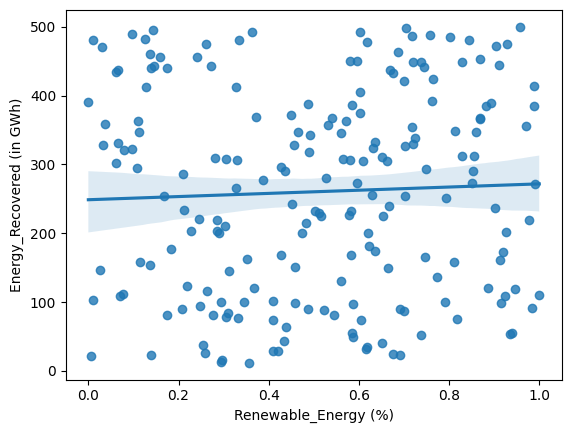

In [21]:
sns.regplot(x=Scaled_df['Renewable_Energy (%)'],y=ds['Energy_Recovered (in GWh)'])
plt.show()

In [22]:
#Making a pollution index and comparing with that also
Scaled_df['Pollution_Index'] = Scaled_df[['Air_Pollution_Index', 'Soil_Pollution_Index', 'Water_Pollution_Index']].mean(axis=1)
ds['Pollution_Index'] = ds[['Air_Pollution_Index', 'Soil_Pollution_Index', 'Water_Pollution_Index']].mean(axis=1)

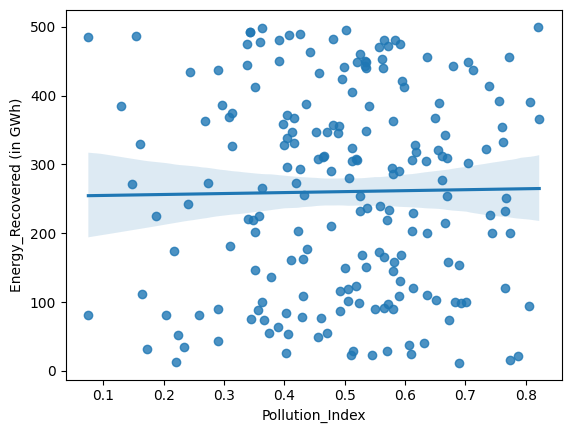

In [23]:
#Comparing with pollution index
sns.regplot(x=Scaled_df['Pollution_Index'],y=ds['Energy_Recovered (in GWh)'])
plt.show()

In [24]:
#now I will take industrial waste and pollution as feature for  model but prediction will not be good due to scattered data
X=Scaled_df[['Industrial_Waste (in tons)','Pollution_Index','CO2_Emissions (in MT)']].values
Y=ds['Energy_Recovered (in GWh)']

#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.3)

#Making model and training it
lr = LinearRegression()
b=lr.fit(x_train,y_train)

y_predict = b.predict(x_test) 


#Checking the analysis of model
from sklearn.metrics import mean_squared_error,r2_score
r2 =r2_score(y_test,y_predict) 
mse =mean_squared_error(y_test,y_predict) 
print('R2 value: ',r2)
print('MeanSquaredError: ',mse)



R2 value:  0.004637181241879285
MeanSquaredError:  21501.22875508626


In [25]:
#making a threshhold to classify pollution level
pollution_mean = round(ds['Pollution_Index'].mean())
#Catogiries 
def classifySeverity(value):
    if abs(value - pollution_mean) <= 2:
        return 'moderate'
    elif value<pollution_mean:
        return 'low'
    else:
        return 'high'
    

ds['severity'] = ds['Pollution_Index'].apply(classifySeverity)
ds['severity'].value_counts()

severity
high        99
low         93
moderate     8
Name: count, dtype: int64

In [ ]:
#Making a logistic regression model
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)
from sklearn.model_selection import train_test_split

#Splitting dataset
x=Scaled_df[['Pollution_Index','CO2_Emissions (in MT)']]

Y=ds['severity']

x_train,x_test,y_train,y_test = train_test_split(x,Y,train_size=0.3)

a=logr.fit(x_train,y_train)

y_predict = a.predict(x_test)

#Checking Accuracy and other factors of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test,y_predict)

print("Model Accuracy: ",accuracy)

cr=classification_report(y_test,y_predict)
print(cr)



Model Accuracy:  0.8
              precision    recall  f1-score   support

        high       0.93      0.75      0.83        73
         low       0.70      0.95      0.81        60
    moderate       0.00      0.00      0.00         7

    accuracy                           0.80       140
   macro avg       0.55      0.57      0.55       140
weighted avg       0.79      0.80      0.78       140



c:\Users\amaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

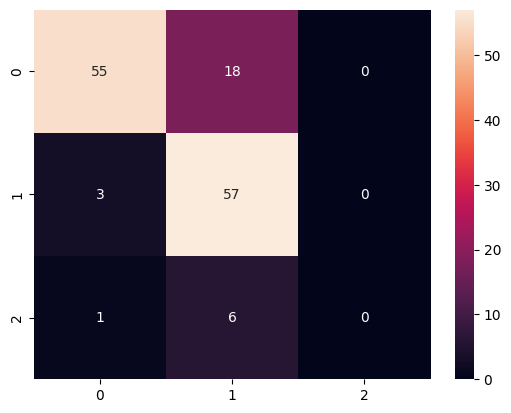

In [31]:
#Logistic regression model is more accurate as compared to linear regression  model
#creating a confusion matrix fo logistic regression
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

Summary:
The project analyzes global pollution trends and explores how energy recovery methods like waste-to-energy and industrial heat reuse can help reduce environmental and health impacts. Using data visualizations, it highlights high pollution levels in low-income countries and emphasizes the need for clean energy investment and stronger policies. The study underscores that improving air quality and expanding energy access are critical steps toward a sustainable future.